In [1]:
## Deep Learning

# logistic regression을 이용하여 AND 연산을 학습

import tensorflow as tf

# training data set
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

y_data = [[0],[0],[0],[1]]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train node
# train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
        
    if step % 300 == 0:
        print(cost_val)     
        
# Accuracy 측정 
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run([accuracy], feed_dict={X:x_data, Y:y_data})))

Instructions for updating:
Colocations handled automatically by placer.
1.0874467
0.62030375
0.5239312
0.47458062
0.43655837
0.40491945
0.37802607
0.3548587
0.3346709
0.31689894
정확도 : [1.0]


In [2]:
## Deep Learning

# NN(Neural Network)을 이용하여 XOR 연산을 학습

import tensorflow as tf

# training data set( XOR에 대한 진리표)
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

y_data = [[0],[1],[1],[0]]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
# 첫번째 레이어
W1 = tf.Variable(tf.random_normal([2,8]), name="weight1") # ([2,?]) : ? : 두번째레이어의 몇개의 input을 사용할껀지
b1 = tf.Variable(tf.random_normal([8]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

# 두번째 레이어
W2 = tf.Variable(tf.random_normal([8,1]), name="weight2") 
b2 = tf.Variable(tf.random_normal([1]), name="bias2")

# Hypothesis
logits = tf.matmul(layer1,W2) + b2
H = tf.sigmoid(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train node
# train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
        
    if step % 3000 == 0:
        print(cost_val)     
        
# Accuracy 측정 
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run([accuracy], feed_dict={X:x_data, Y:y_data})))

1.3675065
0.6925141
0.6671529
0.624359
0.5427338
0.42042732
0.2887126
0.19071506
0.13101208
0.09545102
정확도 : [1.0]


In [3]:
## NNIST (Neural Network)
## tensorflow에 example로 포함된 MNIST예제를 NN으로 학습.(accuracy => 95%)

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Data Loading 
mnist = input_data.read_data_sets("./data/mnist", one_hot=True) # 폴더를 만들고 데이터 저장 , 압축파일 파일 압축풀 필요없음

# 데이터 확인
print(mnist.train.num_examples) # 학습용 데이터의 개수 / 학습용 = train , 테스트용 = 
print(mnist.train.images.shape) # (55000, 784)
                                #  28 X 28 이미지를 1차원 형태로 저장
print(mnist.train.labels.shape)

# plt.imshow(mnist.train.images[0].reshape(28,28), cmap="Greys", interpolation="nearest") # 1차원데이터를 2차원데이터로 변경
# # 55000개의 그림중에 이미지를 선택해서 픽셀정보를 줘야한다.
# plt.show()
# print(mnist.train.labels[0])

# placeholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32) 
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# Weight & bias
W1 = tf.Variable(tf.random_normal([784,256]), name="weight1")
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1) # sigmoid대신 relu사용 :  값이 희미해지기 때문에 relu사용 / sigmoid : 0과 1사이  / softmax : 확률값

W2 = tf.Variable(tf.random_normal([256,256]), name="weight2")
b2 = tf.Variable(tf.random_normal([256]), name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)

W3 = tf.Variable(tf.random_normal([256,10]), name="weight3")
b3 = tf.Variable(tf.random_normal([10]), name="bias3")

# Hypothesis
logits = tf.matmul(layer2,W3) + b3  
H = tf.nn.softmax(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train node 생성
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train = optimizer.minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
# GradientDescentOptimizer 보다 효율 좋은 AdamOptimizer 사용  / learning_rate=0.01 => learning_rate=0.001


# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

""" 
사용하는 데이터의 크기가 상당히 크다.
메모리의 문제때문에 한번에 불러올수 없다.
데이터의 크기에 상관없이 학습하는 방식이 필요하다.!! => 잘라서 학습하는 방식으로 수행
epoch : training data를 1번 학습시키는 것.
"""
# epoch 학습진행
training_epoch = 30 # for 루프를 30만큼 돌린다는 의미
batch_size = 100 #  55000개의 행을 다 읽어들이는게 아니라 100개의 행을 읽어서 반복학습!! (아중루프가 돔) / 얼마만큼의 사이즈로 불러드릴껀지

for step in range(training_epoch): # 30 epoch 만큼 반복
    num_of_iter = int(mnist.train.num_examples /  batch_size) # 550번 끊어 읽겠다는 의미
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size) 
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x , Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)     

# 학습진행
# for step in range(3000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images, Y:mnist.train.labels})
    
#     if step % 300 == 0:
#         print(cost_val)

# Accuracy(정확도) 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run([accuracy], feed_dict={X:mnist.test.images, Y:mnist.test.labels})

print("정확도 :{}".format(result))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
55000
(55000, 784)
(55000, 10)
56.34009
27.866474
3.0738087
6.5800395
2.0089886
0.2686798
0.3826184
0.0
0.0
0.4601483
정확도 :[0.9576]


In [4]:
## NNIST (Neural Network)
## tensorflow에 example로 포함된 MNIST예제를 NN으로 학습.(accuracy => 95%)

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# Data Loading 
mnist = input_data.read_data_sets("./data/mnist", one_hot=True) # 폴더를 만들고 데이터 저장 , 압축파일 파일 압축풀 필요없음

# 데이터 확인
print(mnist.train.num_examples) # 학습용 데이터의 개수 / 학습용 = train , 테스트용 = 
print(mnist.train.images.shape) # (55000, 784)
                                #  28 X 28 이미지를 1차원 형태로 저장
print(mnist.train.labels.shape)

# plt.imshow(mnist.train.images[0].reshape(28,28), cmap="Greys", interpolation="nearest") # 1차원데이터를 2차원데이터로 변경
# # 55000개의 그림중에 이미지를 선택해서 픽셀정보를 줘야한다.
# plt.show()
# print(mnist.train.labels[0])

# placeholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32) 
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# Weight & bias # weight값 초기화
W1 = tf.get_variable("weight1", shape=[784,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1) # sigmoid대신 relu사용 :  값이 희미해지기 때문에 relu사용 / sigmoid : 0과 1사이  / softmax : 확률값

W2 = tf.get_variable("weight2",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)

W3 = tf.get_variable("weight3",shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name="bias3")

# Hypothesis
logits = tf.matmul(layer2,W3) + b3  
H = tf.nn.relu(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train node 생성
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train = optimizer.minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
# GradientDescentOptimizer 보다 효율 좋은 AdamOptimizer 사용  / learning_rate=0.01 => learning_rate=0.001


# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

""" 
사용하는 데이터의 크기가 상당히 크다.
메모리의 문제때문에 한번에 불러올수 없다.
데이터의 크기에 상관없이 학습하는 방식이 필요하다.!! => 잘라서 학습하는 방식으로 수행
epoch : training data를 1번 학습시키는 것.
"""
# epoch 학습진행
training_epoch = 30 # for 루프를 30만큼 돌린다는 의미
batch_size = 100 #  55000개의 행을 다 읽어들이는게 아니라 100개의 행을 읽어서 반복학습!! (아중루프가 돔) / 얼마만큼의 사이즈로 불러드릴껀지

for step in range(training_epoch): # 30 epoch 만큼 반복
    num_of_iter = int(mnist.train.num_examples /  batch_size) # 550번 끊어 읽겠다는 의미
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size) 
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x , Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)     

# 학습진행
# for step in range(3000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images, Y:mnist.train.labels})
    
#     if step % 300 == 0:
#         print(cost_val)

# Accuracy(정확도) 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run([accuracy], feed_dict={X:mnist.test.images, Y:mnist.test.labels})

print("정확도 :{}".format(result))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
55000
(55000, 784)
(55000, 10)
0.12418873
0.06924549
0.051645197
0.050949465
0.0053187
0.00036422478
0.0024730668
0.00020901799
0.004437133
0.0004658118
정확도 :[0.9811]


In [5]:
## 2019-07-17
# Convolution example
import tensorflow as tf
import numpy as np

# imange의 형태
# 1장의 이미지는 3차원 형태의 데이터
# (이미지의 개수, width, height, color)
# (1, 3, 3, 1)
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
# filter를 준비해야한다. => 3차원 
# (width, height, color, 필터의 개수) , 4차원
# (2, 2, 1, 1)
# 필터들의 집합 => weight
weight = np.array([[[[1, -5, 10]],[[1, -5, 10]]],
                   [[[1, -5, 10]],[[1, -5, 10]]]])
print(weight.shape)

# stride 지정 => 사실 2차원이면 되는데 행렬연산때문에 
# (1, stride width, stride height, 1) => 4차원으로 표현
# stride = [1,1,1,1]
#                    (이미지,필터,)
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1], padding="VALID") 
# padding="VALID": 이미지의 사이즈가 줄어든다. / padding="SAME" :원본과 똑같이 맞추라는 의미
print(conv2d.shape)
# 하나의 이미지에 필터 3개를 적용시키면 (1, 2, 2, 3)

(1, 3, 3, 1)
(2, 2, 1, 3)
(1, 2, 2, 3)


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


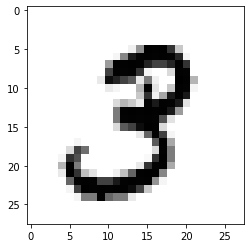

(1, 14, 14, 5)
(5, 14, 14, 1)


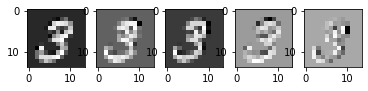

In [7]:
## mnist 예제를 이용해서 하나의 이미지에 대한
## convolutional image 5개를 생성해보기!
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt # 일반적으로 그림그리는 모듈

# Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True) # y측 레이블이 one_hot형태로 나올수 있게 해줌

# training 이미지 중 2번째 이미지의 정보를 얻어온다. 픽셀테이터 땡겨오는것
img = mnist.train.images[1] # 1차원 데이터
img = img.reshape(28,28)    # 2차원 데이터로 변환
# print(img.shape) # 1차원의형태를 2차원의 형태로 변경해줘야한다.

plt.imshow(img, cmap="Greys", interpolation="nearest")
plt.show()

# 해당 이미지를 convolution 이미지로 변경
# 2차원 형태의 img를 4차원 형태의 img로 변환
img = img.reshape(-1,28,28,1) # 가로,세로는 변하지 않고 흑백컬러1 / 이미지가 여러장이면 -1부분이 바뀌게 될것임.
# img.shape
# 이미지가 준비 되었으니 필터를 여러개 준비 (5개 정도)
# 5개의 필터를 이용 , 2 x 2 짜리 필터를 이용
# (2,2,1,5) 랜덤하게 만들꺼임
W = tf.Variable(tf.random_normal([2,2,1,5]), name="filter")
conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1], padding="SAME")
# 2칸씩움직이는 stride / padding="SAME" : 원본과 똑같은 이미지가 5개 생성
print(conv2d.shape) # (1, 14, 14, 5) => 14 x 14 짜리 이미지가 5개 생성

# 새로 생성된 이미지를 plt를 이용해서 확인
sess = tf.Session() # sess.run을 해야지 배열값을 얻을수 있다.
sess.run(tf.global_variables_initializer()) # 초기화
conv2d = sess.run(conv2d)

# 배열의 축을 임의로 변경 (1, 14, 14, 5) => (5, 14, 14, 1) -> 루프를 돌리기 위해서 배열 축 임의로 변경 , 데이터를 쉽게 추출하기 위해서
conv2d = np.swapaxes(conv2d,0,3) 
print(conv2d.shape) # (5, 14, 14, 1)

fig,axes = plt.subplots(1,5) # 1행 5열짜리 subplot을 생성 / subplots : 그림을 여러개 그릴 수 있음
                             # axes : 각각의 subplot의 배열
for idx,item in enumerate(conv2d): # enumerate : 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
    axes[idx].imshow(item.reshape(14,14), cmap="Greys")
plt.show()
    

In [8]:
%%time
## 셀 수행하는 데 얼마나 걸리는지 출력하는거, 제일 상단에 있어야한다. %%time은 jupyter notebook에서만 돌아간당!!!
#### MNIST with CNN
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

## 0. 그래프 초기화
tf.reset_default_graph()

## 1. Data Loading & Data 정제
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

## 2. placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32) 
Y = tf.placeholder(shape=[None,10], dtype=tf.float32) 
drop_rate = tf.placeholder(dtype=tf.float32)

## 3. Convolution 
## 3.1 Convolution layer 1
x_img =  tf.reshape(X,[-1,28,28,1]) # x에대한 shape를 변경해줄꺼임 2차원 -> 4차원 (이미지의 개수, 가로, 세로, 컬러)
W1 = tf.Variable(tf.random_normal([2,2,1,32]), name="filter1") # 2행 2열 색 32개의 필터
L1 = tf.nn.conv2d(x_img,W1,strides=[1,2,2,1], padding="SAME") # tf.nn.conv2d(입력이미지, 필터, stride=[],padding="")
                                                              #                               얼마만큼 움직일껀지
print(L1.shape)  # (?, 14, 14, 32)

# sigmoid는 할수록 값이 작아져서 0에 가까워지기 때문에 relu를 사용한다.
L1 = tf.nn.relu(L1)

L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME") 
# tf.nn.max_pool(입력받을값,ksize=[],strides=[], padding="") : 큰 데이터를 작은데이터로 줄이는 것
print(L1.shape)  # (?, 7, 7, 32)

## 3.2 Convolution layer 2
W2 = tf.Variable(tf.random_normal([3,3,32,64]), name="filter2") # 3행 3열 색 64개의 필터 => 32 -> 입력으로 들어오는 형태 shape를 맞춰줘야함
L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1], padding="SAME") # tf.nn.conv2d(입력이미지, 필터, stride=[],padding="")
                                                              #                               얼마만큼 움직일껀지
print(L2.shape)  # (?, 7, 7, 64)

# sigmoid는 할수록 값이 작아져서 0에 가까워지기 때문에 relu를 사용한다.
L2 = tf.nn.relu(L2)

L2 = tf.nn.max_pool(L2,ksize=[1,1,1,1], strides=[1,1,1,1], padding="SAME") 
# tf.nn.max_pool(입력받을값,ksize=[],strides=[], padding="") : 큰 데이터를 작은데이터로 줄이는 것
print(L2.shape)  # (?, 7, 7, 64) => ?는 이미지의 수

L2 = tf.reshape(L2,[-1,7*7*64])

## 4. Neural Network
## 4.1 Weight & bias
W3 = tf.get_variable("weight3", shape=[7*7*64,256], initializer=tf.contrib.layers.xavier_initializer()) # shape=["컬럼수","아웃풋수"] / 위에서는 필터의 형태로 잡기위해 tf.Variable()사용

b3 = tf.Variable(tf.random_normal([]), name="bias3")

# Hypothesis
logits = tf.matmul(layer2,W3) + b3  
H = tf.nn.relu(logits)

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train node 생성
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train = optimizer.minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
# GradientDescentOptimizer 보다 효율 좋은 AdamOptimizer 사용  / learning_rate=0.01 => learning_rate=0.001


# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

""" 
사용하는 데이터의 크기가 상당히 크다.
메모리의 문제때문에 한번에 불러올수 없다.
데이터의 크기에 상관없이 학습하는 방식이 필요하다.!! => 잘라서 학습하는 방식으로 수행
epoch : training data를 1번 학습시키는 것.
"""
# epoch 학습진행
training_epoch = 100 # for 루프를 30만큼 돌린다는 의미
batch_size = 100 #  55000개의 행을 다 읽어들이는게 아니라 100개의 행을 읽어서 반복학습!! (아중루프가 돔) / 얼마만큼의 사이즈로 불러드릴껀지

for step in range(training_epoch): # 30 epoch 만큼 반복
    num_of_iter = int(mnist.train.num_examples /  batch_size) # 550번 끊어 읽겠다는 의미
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size) 
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x , Y:batch_y})
        
    if step % 10 == 0:
        print(cost_val)     

# 학습진행
# for step in range(3000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images, Y:mnist.train.labels})
    
#     if step % 300 == 0:
#         print(cost_val)

# Accuracy(정확도) 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run([accuracy], feed_dict={X:mnist.test.images, Y:mnist.test.labels})

print("정확도 :{}".format(result))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(?, 14, 14, 32)
(?, 7, 7, 32)
(?, 7, 7, 64)
(?, 7, 7, 64)
Wall time: 981 ms
